# Lead Scoring Case Study

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EXPLORATORY DATA ANALYSIS
### Data understanding, preparation

In [6]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

## No duplicate values found in Prospect ID & Lead Number
## Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped.

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [8]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [9]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Dropping cols with more than 40 % missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [12]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

### As we can see the Number of Values for India are quite high (about 97% of the Data), this column can be dropped

In [16]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [17]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

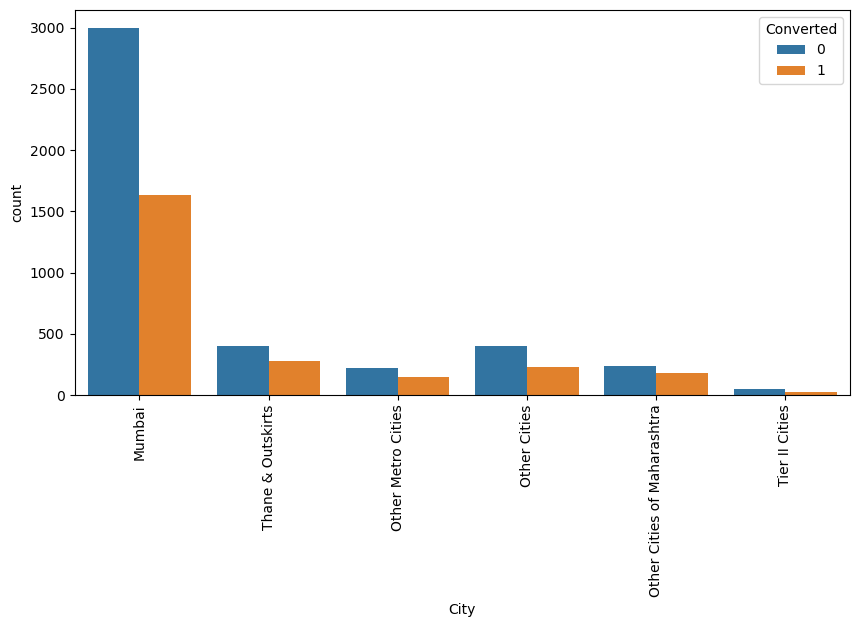

In [86]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1= sns.countplot(x= 'City', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [24]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

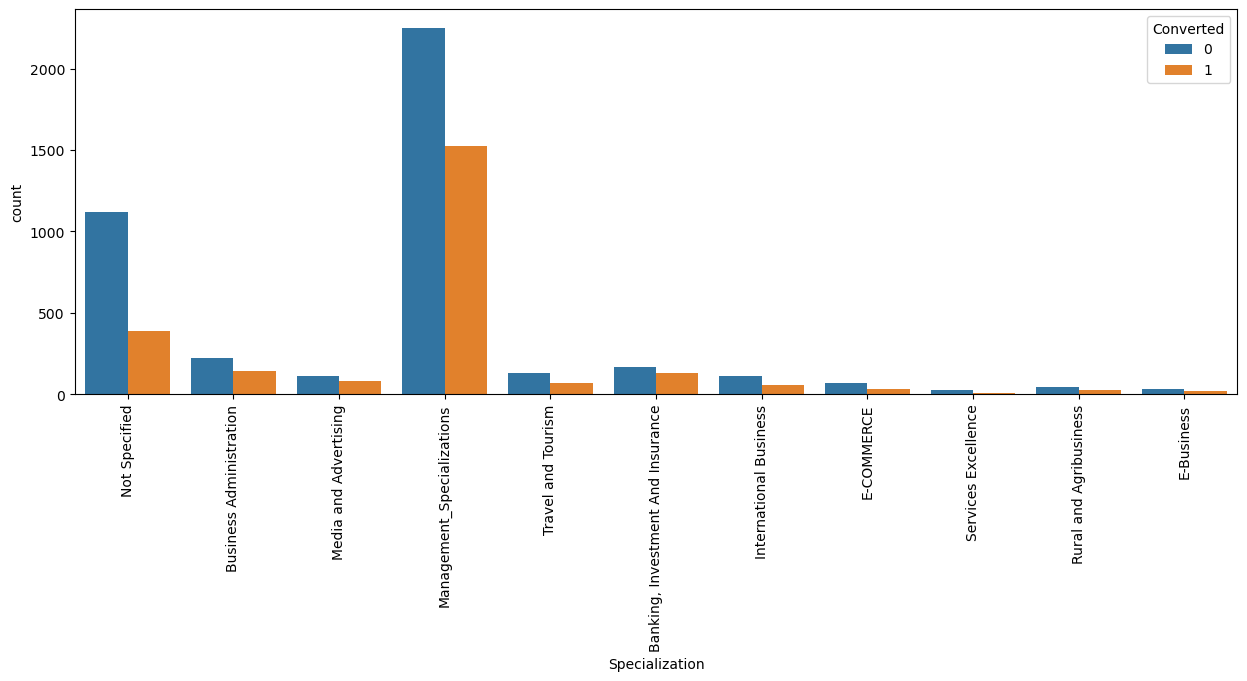

In [85]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Specialization', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

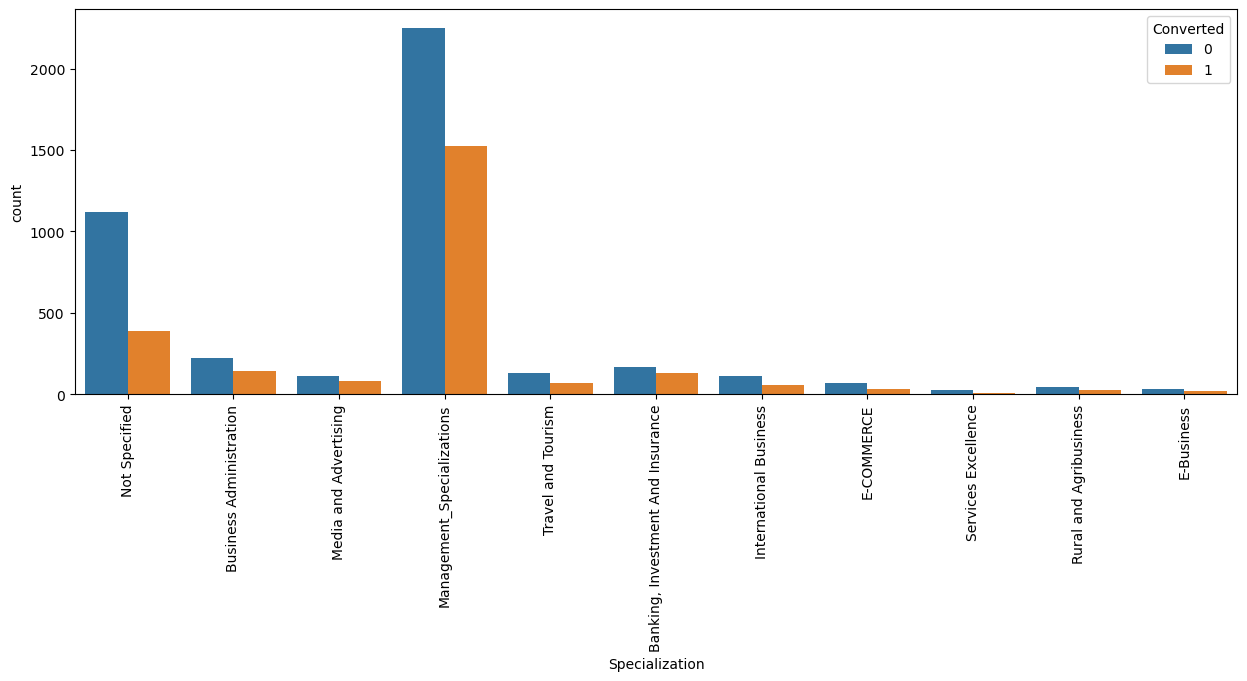

In [84]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(x='Specialization', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [31]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

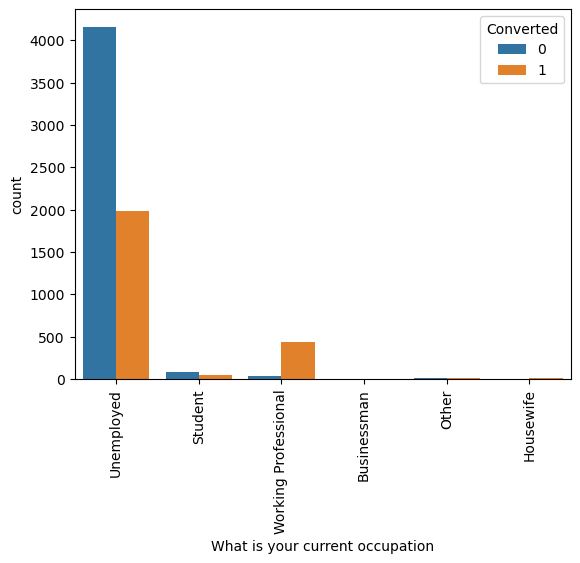

In [83]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What is your current occupation', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## Working Professionals going for the course have high chances of joining it. Unemployed leads are the most in terms of Absolute numbers.

In [34]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

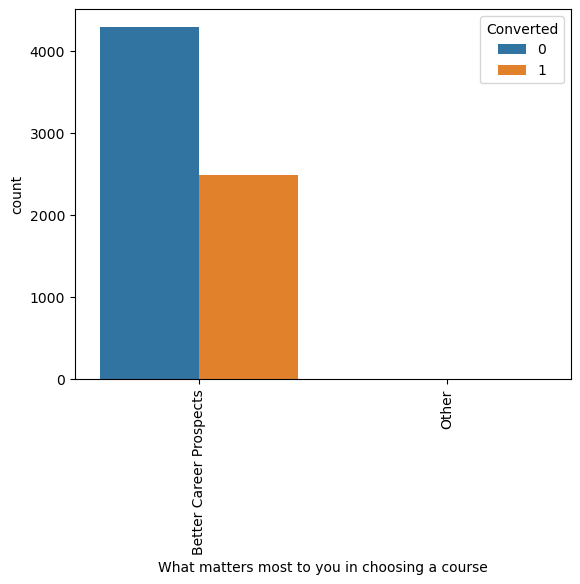

In [82]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What matters most to you in choosing a course', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [39]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

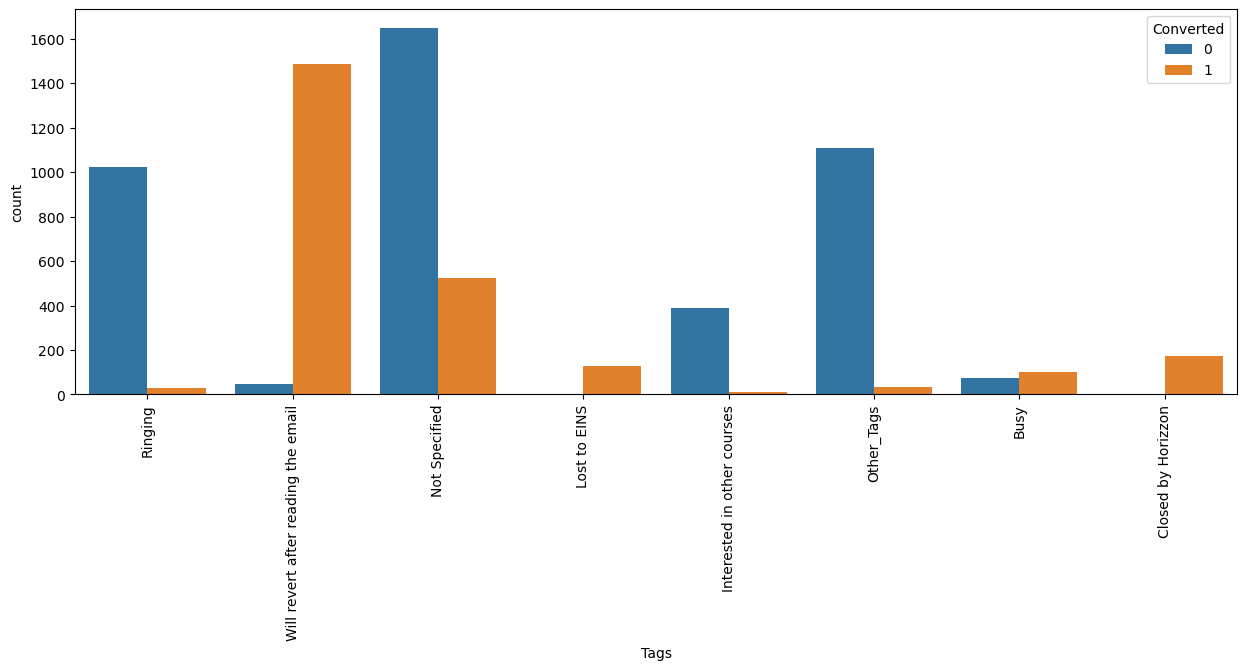

In [81]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Tags', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [44]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [45]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [46]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

### We can group some of the lower frequency occuring labels under a common label 'Others'

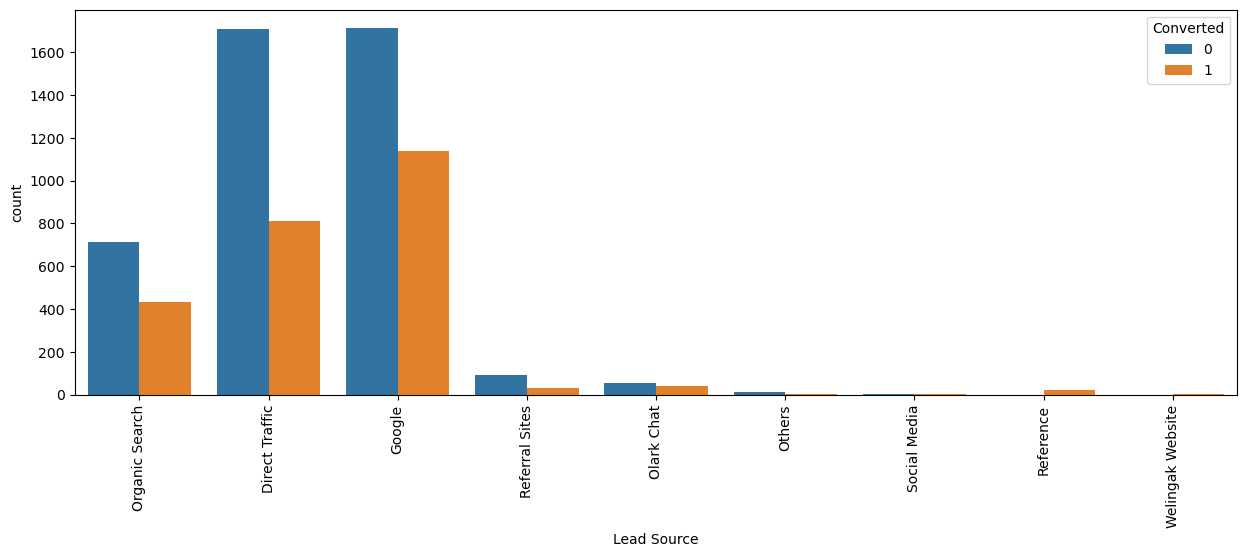

In [80]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Source', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference

### Maximum number of leads are generated by Google and Direct traffic.
### Conversion Rate of reference leads and leads through welingak website is high.
### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [48]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [49]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [50]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [51]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [52]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [53]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [54]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

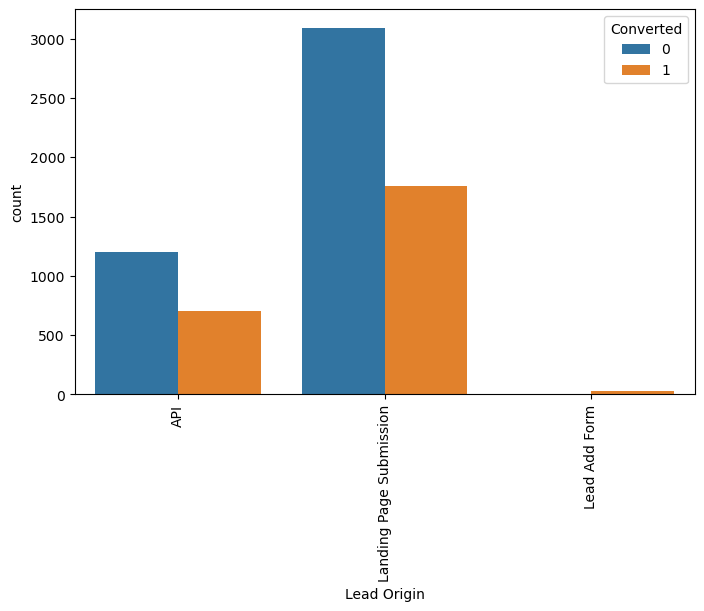

In [79]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(x='Lead Origin', hue=leads.Converted, data= leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference

#### API and Landing Page Submission bring higher number of leads as well as conversion.
#### Lead Add Form has a very high conversion rate but count of leads are not very high.
#### Lead Import and Quick Add Form get very few leads.
#### In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

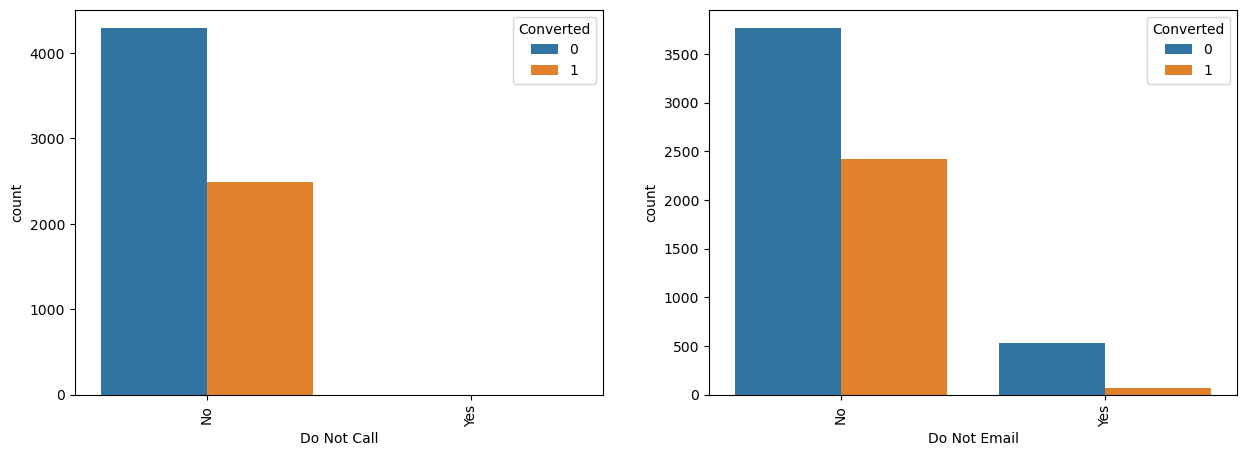

In [78]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x='Do Not Call',  hue=leads.Converted, data= leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x= 'Do Not Email',  hue=leads.Converted, data= leads)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [57]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [58]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

### We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [59]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [60]:
leads.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [61]:
leads.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [62]:
leads['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [63]:
leads['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [64]:
leads['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [65]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [66]:
leads['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [67]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [68]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [69]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [70]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [71]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [72]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [73]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [74]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

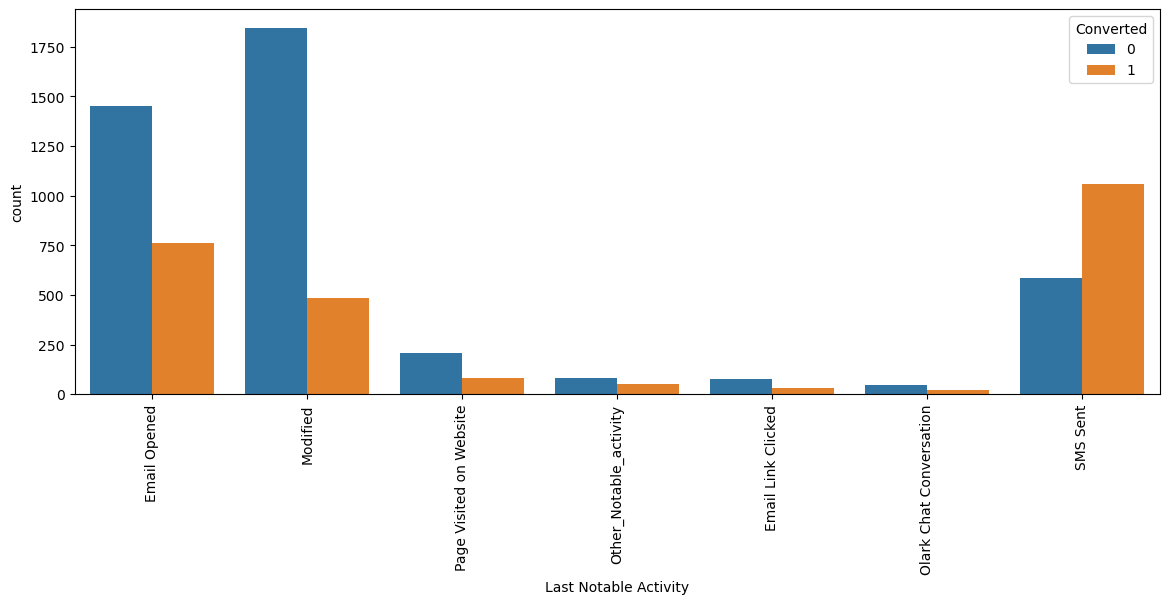

In [75]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [87]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [88]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [89]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

In [90]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

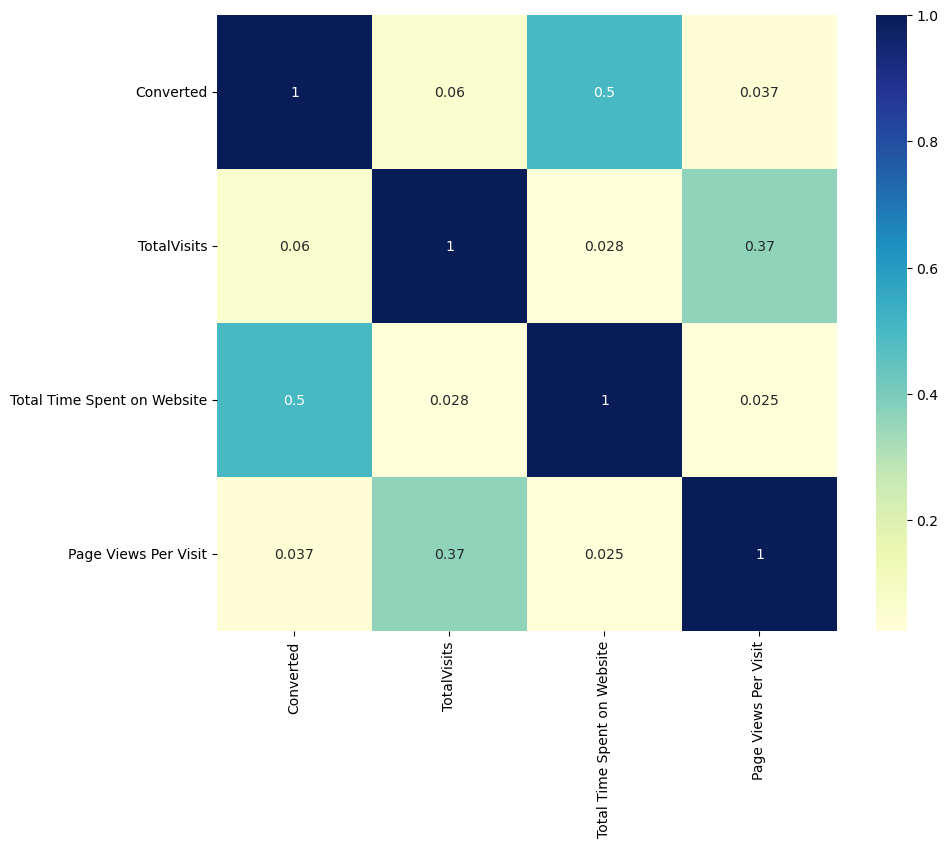

In [91]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

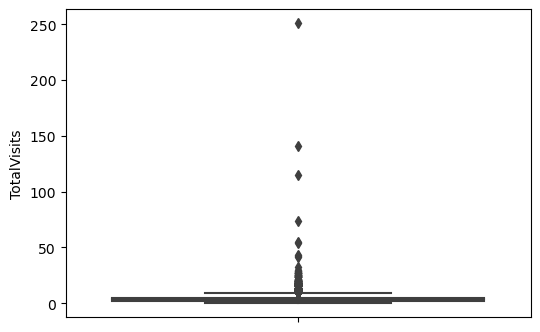

In [92]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

### There are outliers present here

In [93]:
#checking percentile values for "Total Visits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

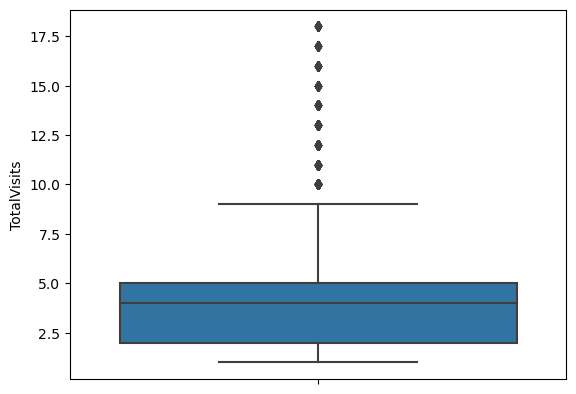

In [94]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [95]:
leads.shape

(6706, 14)

In [96]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

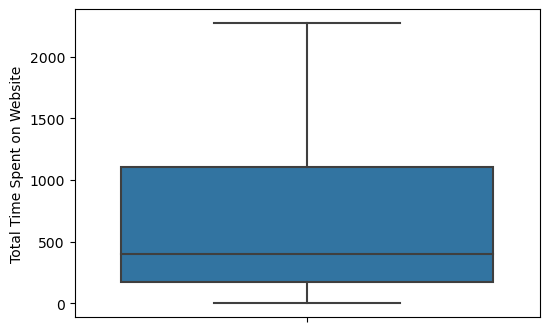

In [97]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

### Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

### Check for Page Views Per Visit:

In [98]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

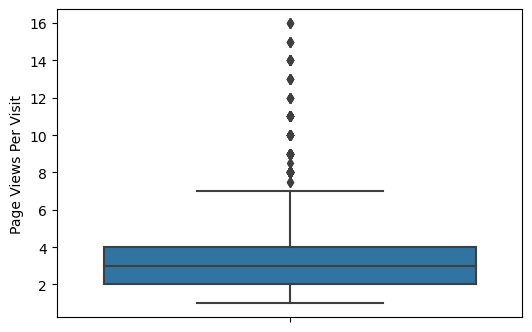

In [99]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


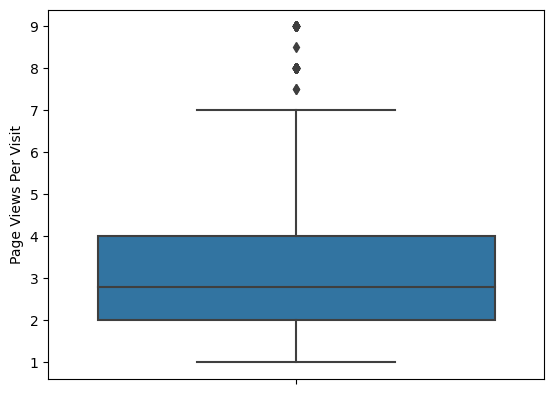

In [100]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [101]:
leads.shape

(6640, 14)

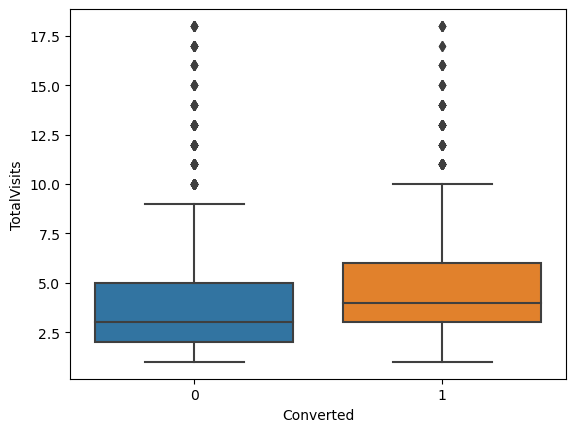

In [102]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()


#### Inference

#### Median for converted and not converted leads are the close.
#### Nothng conclusive can be said on the basis of Total Visits

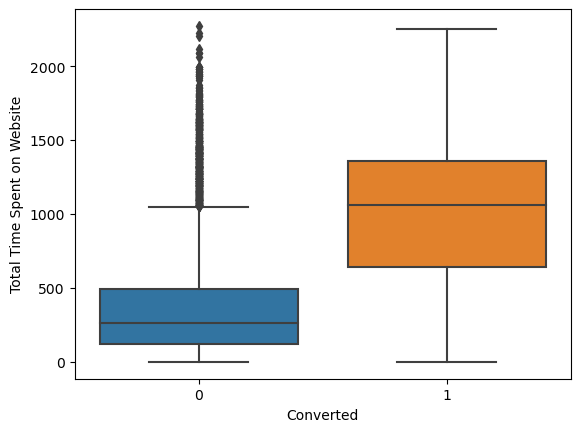

In [103]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

#### Inference

#### Leads spending more time on the website are more likely to be converted.
#### Website should be made more engaging to make leads spend more time.

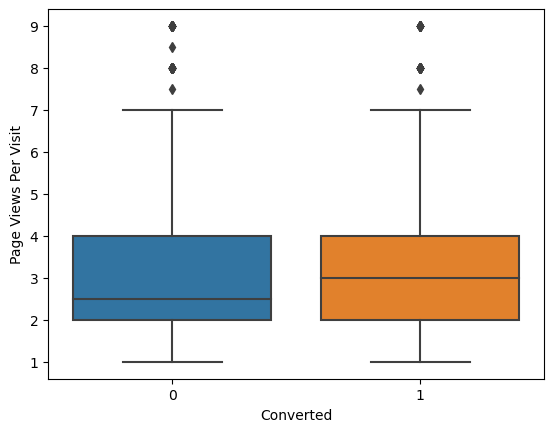

In [104]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

#### Inference

#### Median for converted and unconverted leads is the same.
#### Nothing can be said specifically for lead conversion from Page Views Per Visit


In [105]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### There are no missing values in the columns to be analyzed further

### Creating Dummy Variables

In [106]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [107]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [108]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [109]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [111]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [112]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [113]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [114]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split & Logistic Regression Model Building:

In [115]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 5   What is your current occupation_Housewife             4648 non-null   uint8  
 6   What is your current occupation_Other                 4648 non-null   uint8  
 7   What is your current occupation_Student               4648 non-null   uint8  
 8   What is your current occupation_Unemployed            4

### Scaling of Data:

In [118]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Model Building using Stats Model & RFE:

In [119]:
import statsmodels.api as sm

In [130]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)  
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 15),
 ('What is your current occupation_Other', False, 20),
 ('What is your current occupation_Student', False, 5),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 28),
 ('City_Other Cities of Maharashtra', False, 23),
 ('City_Other Metro Cities', False, 16),
 ('City_Thane & Outskirts', False, 26),
 ('City_Tier II Cities', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', False, 27),
 ('Specialization_Management_Specializations

In [133]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],

In [134]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_

## MODEL BUILDING

In [ ]:
## Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4620
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -855.64
Date:                Thu, 14 Dec 2023   Deviance:                       1711.3
Time:                        22:55:12   Pearson chi2:                 6.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3578      0.531     -0.673      0.501      -1.399       0.684
Total Time Spent on Website                              1.1277      0.066     17.109      0.000       0.999       1.257
Lead Origin_Landing Page Submission                     -0.7147      0.143     -4.983      0.000      -0.996      -0.434
Lead Origin_Lead Add Form                               22.5031   4.44e+04      0.001      1.000   -8.69e+04    8.69e+04
What is your current occupation_Unemployed              -0.7273      0.517     -1.406      0.160      -1.741       0.286
What is your current occupation_Working Professional     0.7012      0.726      0.966      0.334      -0.722       2.124
City_Tier II Cities                                      0.7459      0.657      1.136      0.256      -0.541       2.033
Specialization_Business Administration                   0.4206      0.281      1.496      0.135      -0.130       0.972
Specialization_E-COMMERCE                                0.5721      0.552      1.037      0.300      -0.509       1.653
Specialization_Media and Advertising                     0.2597      0.423      0.614      0.539      -0.569       1.088
Specialization_Rural and Agribusiness                    0.5512      0.730      0.755      0.450      -0.880       1.983
Lead Source_Olark Chat                                  -0.3006      0.441     -0.682      0.495      -1.165       0.564
Lead Source_Social Media                                -2.4687      1.635     -1.510      0.131      -5.673       0.736
Lead Source_Welingak Website                             2.3468   1.05e+05   2.24e-05      1.000   -2.05e+05    2.05e+05
Last Activity_Converted to Lead                         -0.7007      0.379     -1.851      0.064      -1.443       0.041
Last Activity_Email Bounced                             -1.4583      0.564     -2.584      0.010      -2.565      -0.352
Last Activity_Page Visited on Website                   -0.7036      0.283     -2.484      0.013      -1.259      -0.148
Last Activity_SMS Sent                                   0.6975      0.280      2.495      0.013       0.150       1.245
Last Notable Activity_Modified                          -0.7608      0.199     -3.820      0.000      -1.151      -0.370
Last Notable Activity_Olark Chat Conversation           -0.8566      0.558     -1.536      0.124      -1.949       0.236
Last Notable Activity_SMS Sent                           1.2529      0.315      3.983      0.000       0.636       1.869
Tags_Busy                                                1.0724      0.250      4.285      0.000       0.582       1.563
Tags_Closed by Horizzon                                 27

#### p-value of variable Lead Origin_Lead Add Form is high, so we can drop it

In [137]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

In [138]:
## Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4621
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.39
Date:                Thu, 14 Dec 2023   Deviance:                       1712.8
Time:                        22:57:53   Pearson chi2:                 6.53e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3491      0.531     -0.657      0.511      -1.390       0.692
Total Time Spent on Website                              1.1293      0.066     17.132      0.000       1.000       1.258
Lead Origin_Landing Page Submission                     -0.7207      0.143     -5.029      0.000      -1.002      -0.440
What is your current occupation_Unemployed              -0.7267      0.517     -1.405      0.160      -1.740       0.287
What is your current occupation_Working Professional     0.7048      0.726      0.971      0.331      -0.717       2.127
City_Tier II Cities                                      0.7474      0.657      1.138      0.255      -0.539       2.034
Specialization_Business Administration                   0.4202      0.281      1.494      0.135      -0.131       0.971
Specialization_E-COMMERCE                                0.5730      0.552      1.039      0.299      -0.508       1.654
Specialization_Media and Advertising                     0.2601      0.423      0.615      0.538      -0.568       1.089
Specialization_Rural and Agribusiness                    0.5505      0.730      0.754      0.451      -0.881       1.982
Lead Source_Olark Chat                                  -0.3073      0.441     -0.697      0.486      -1.171       0.557
Lead Source_Social Media                                -2.4692      1.636     -1.509      0.131      -5.677       0.738
Lead Source_Welingak Website                            24.8415   9.47e+04      0.000      1.000   -1.86e+05    1.86e+05
Last Activity_Converted to Lead                         -0.7011      0.378     -1.853      0.064      -1.443       0.041
Last Activity_Email Bounced                             -1.4600      0.564     -2.587      0.010      -2.566      -0.354
Last Activity_Page Visited on Website                   -0.7069      0.283     -2.496      0.013      -1.262      -0.152
Last Activity_SMS Sent                                   0.6978      0.280      2.496      0.013       0.150       1.246
Last Notable Activity_Modified                          -0.7660      0.199     -3.848      0.000      -1.156      -0.376
Last Notable Activity_Olark Chat Conversation           -0.8647      0.558     -1.551      0.121      -1.957       0.228
Last Notable Activity_SMS Sent                           1.2482      0.315      3.969      0.000       0.632       1.865
Tags_Busy                                                1.0716      0.250      4.282      0.000       0.581       1.562
Tags_Closed by Horizzon                                 27.2184   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Tags_Interested in other courses                        -2

#### p-value of variable Tags_Closed by Horizzon is high, so we can drop it

In [139]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [140]:
## Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4622
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.00
Date:                Thu, 14 Dec 2023   Deviance:                       1974.0
Time:                        22:58:59   Pearson chi2:                 6.92e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5875
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2314      0.434      0.533      0.594      -0.620       1.083
Total Time Spent on Website                              1.1365      0.061     18.611      0.000       1.017       1.256
Lead Origin_Landing Page Submission                     -0.4746      0.131     -3.621      0.000      -0.731      -0.218
What is your current occupation_Unemployed              -1.1509      0.422     -2.729      0.006      -1.977      -0.324
What is your current occupation_Working Professional     1.5409      0.564      2.730      0.006       0.435       2.647
City_Tier II Cities                                      0.5643      0.599      0.943      0.346      -0.609       1.738
Specialization_Business Administration                   0.3598      0.261      1.378      0.168      -0.152       0.872
Specialization_E-COMMERCE                                0.6251      0.477      1.311      0.190      -0.309       1.559
Specialization_Media and Advertising                     0.2680      0.390      0.688      0.492      -0.496       1.032
Specialization_Rural and Agribusiness                    0.2008      0.708      0.284      0.777      -1.186       1.588
Lead Source_Olark Chat                                  -0.4364      0.430     -1.015      0.310      -1.279       0.406
Lead Source_Social Media                                -2.7376      1.609     -1.701      0.089      -5.891       0.416
Lead Source_Welingak Website                            21.3043    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
Last Activity_Converted to Lead                         -1.3814      0.354     -3.901      0.000      -2.076      -0.687
Last Activity_Email Bounced                             -1.8942      0.496     -3.819      0.000      -2.866      -0.922
Last Activity_Page Visited on Website                   -0.5394      0.227     -2.378      0.017      -0.984      -0.095
Last Activity_SMS Sent                                  -0.0133      0.250     -0.053      0.957      -0.503       0.476
Last Notable Activity_Modified                          -0.2359      0.162     -1.456      0.145      -0.553       0.082
Last Notable Activity_Olark Chat Conversation           -0.8340      0.513     -1.627      0.104      -1.839       0.171
Last Notable Activity_SMS Sent                           1.7571      0.288      6.092      0.000       1.192       2.322
Tags_Busy                                                0.7746      0.245      3.159      0.002       0.294       1.255
Tags_Interested in other courses                        -2.8074      0.432     -6.492      0.000      -3.655      -1.960
Tags_Lost to EINS                                        4

#### p-value of variable Last Notable Activity_Modified is high, so we can drop it

In [141]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Modified',1)

In [142]:
## Model 4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4623
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -988.07
Date:                Thu, 14 Dec 2023   Deviance:                       1976.1
Time:                        22:59:55   Pearson chi2:                 7.13e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1458      0.430      0.339      0.735      -0.698       0.989
Total Time Spent on Website                              1.1334      0.061     18.594      0.000       1.014       1.253
Lead Origin_Landing Page Submission                     -0.4711      0.131     -3.599      0.000      -0.728      -0.215
What is your current occupation_Unemployed              -1.1385      0.422     -2.700      0.007      -1.965      -0.312
What is your current occupation_Working Professional     1.5700      0.565      2.778      0.005       0.462       2.678
City_Tier II Cities                                      0.5512      0.602      0.916      0.360      -0.628       1.730
Specialization_Business Administration                   0.3632      0.261      1.390      0.164      -0.149       0.875
Specialization_E-COMMERCE                                0.6305      0.475      1.327      0.184      -0.301       1.562
Specialization_Media and Advertising                     0.2609      0.391      0.668      0.504      -0.505       1.026
Specialization_Rural and Agribusiness                    0.2057      0.707      0.291      0.771      -1.181       1.592
Lead Source_Olark Chat                                  -0.4335      0.430     -1.009      0.313      -1.275       0.408
Lead Source_Social Media                                -2.8240      1.640     -1.722      0.085      -6.038       0.390
Lead Source_Welingak Website                            21.3070    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
Last Activity_Converted to Lead                         -1.5448      0.336     -4.597      0.000      -2.203      -0.886
Last Activity_Email Bounced                             -1.9972      0.491     -4.070      0.000      -2.959      -1.035
Last Activity_Page Visited on Website                   -0.5806      0.225     -2.582      0.010      -1.021      -0.140
Last Activity_SMS Sent                                  -0.1794      0.222     -0.810      0.418      -0.614       0.255
Last Notable Activity_Olark Chat Conversation           -0.7592      0.510     -1.488      0.137      -1.759       0.241
Last Notable Activity_SMS Sent                           1.9909      0.240      8.299      0.000       1.521       2.461
Tags_Busy                                                0.7876      0.246      3.205      0.001       0.306       1.269
Tags_Interested in other courses                        -2.8782      0.431     -6.685      0.000      -3.722      -2.034
Tags_Lost to EINS                                        4.8224      0.630      7.653      0.000       3.587       6.057
Tags_Other_Tags                                         -2

#### p-value of variable Last Activity_Page Visited on Website is high so we can drop it

In [143]:
#dropping column with high p-value

col = col.drop('Last Activity_Page Visited on Website',1)

In [144]:
## Model 5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4624
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -991.58
Date:                Thu, 14 Dec 2023   Deviance:                       1983.2
Time:                        23:02:41   Pearson chi2:                 7.10e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5867
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0690      0.430      0.161      0.872      -0.774       0.912
Total Time Spent on Website                              1.1252      0.061     18.565      0.000       1.006       1.244
Lead Origin_Landing Page Submission                     -0.4830      0.131     -3.698      0.000      -0.739      -0.227
What is your current occupation_Unemployed              -1.1342      0.422     -2.685      0.007      -1.962      -0.306
What is your current occupation_Working Professional     1.5403      0.569      2.705      0.007       0.424       2.656
City_Tier II Cities                                      0.5379      0.594      0.905      0.365      -0.627       1.703
Specialization_Business Administration                   0.3634      0.261      1.391      0.164      -0.149       0.875
Specialization_E-COMMERCE                                0.6125      0.472      1.296      0.195      -0.313       1.539
Specialization_Media and Advertising                     0.2019      0.388      0.520      0.603      -0.559       0.962
Specialization_Rural and Agribusiness                    0.1772      0.706      0.251      0.802      -1.207       1.561
Lead Source_Olark Chat                                  -0.4190      0.428     -0.978      0.328      -1.259       0.421
Lead Source_Social Media                                -2.7850      1.633     -1.705      0.088      -5.986       0.416
Lead Source_Welingak Website                            21.0981   1.42e+04      0.001      0.999   -2.78e+04    2.78e+04
Last Activity_Converted to Lead                         -1.4696      0.335     -4.381      0.000      -2.127      -0.812
Last Activity_Email Bounced                             -1.9117      0.490     -3.900      0.000      -2.872      -0.951
Last Activity_SMS Sent                                  -0.0936      0.219     -0.427      0.670      -0.523       0.336
Last Notable Activity_Olark Chat Conversation           -0.6840      0.510     -1.342      0.180      -1.683       0.315
Last Notable Activity_SMS Sent                           1.9873      0.240      8.292      0.000       1.518       2.457
Tags_Busy                                                0.7685      0.245      3.138      0.002       0.288       1.248
Tags_Interested in other courses                        -2.8357      0.428     -6.622      0.000      -3.675      -1.996
Tags_Lost to EINS                                        4.8597      0.629      7.725      0.000       3.627       6.093
Tags_Other_Tags                                         -2.8317      0.243    -11.657      0.000      -3.308      -2.356
Tags_Ringing                                            -3

#### p-value of variable Tags_Busy is high so we can drop it

In [146]:
#dropping column with high p-value
col = col.drop('Tags_Busy',1)

In [147]:
## Model 6
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4625
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -996.50
Date:                Thu, 14 Dec 2023   Deviance:                       1993.0
Time:                        23:03:38   Pearson chi2:                 7.14e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5858
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0904      0.431      0.210      0.834      -0.754       0.935
Total Time Spent on Website                              1.1210      0.060     18.603      0.000       1.003       1.239
Lead Origin_Landing Page Submission                     -0.4467      0.130     -3.437      0.001      -0.702      -0.192
What is your current occupation_Unemployed              -1.1348      0.423     -2.681      0.007      -1.964      -0.305
What is your current occupation_Working Professional     1.5130      0.571      2.649      0.008       0.394       2.632
City_Tier II Cities                                      0.4980      0.597      0.835      0.404      -0.671       1.667
Specialization_Business Administration                   0.4161      0.256      1.623      0.105      -0.086       0.919
Specialization_E-COMMERCE                                0.5537      0.472      1.174      0.240      -0.371       1.478
Specialization_Media and Advertising                     0.2309      0.381      0.605      0.545      -0.517       0.978
Specialization_Rural and Agribusiness                    0.2480      0.679      0.365      0.715      -1.083       1.579
Lead Source_Olark Chat                                  -0.4017      0.429     -0.937      0.349      -1.242       0.438
Lead Source_Social Media                                -2.4443      1.761     -1.388      0.165      -5.895       1.007
Lead Source_Welingak Website                            21.0949   1.43e+04      0.001      0.999    -2.8e+04     2.8e+04
Last Activity_Converted to Lead                         -1.4782      0.334     -4.425      0.000      -2.133      -0.824
Last Activity_Email Bounced                             -1.9397      0.487     -3.980      0.000      -2.895      -0.985
Last Activity_SMS Sent                                  -0.0529      0.217     -0.244      0.808      -0.478       0.373
Last Notable Activity_Olark Chat Conversation           -0.6991      0.509     -1.375      0.169      -1.696       0.298
Last Notable Activity_SMS Sent                           2.0165      0.238      8.466      0.000       1.550       2.483
Tags_Interested in other courses                        -2.8817      0.428     -6.732      0.000      -3.721      -2.043
Tags_Lost to EINS                                        4.8045      0.629      7.642      0.000       3.572       6.037
Tags_Other_Tags                                         -2.9119      0.242    -12.026      0.000      -3.386      -2.437
Tags_Ringing                                            -3.6269      0.285    -12.740      0.000      -4.185      -3.069
Tags_Will revert after reading the email                 4

#### Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [148]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_SMS Sent,5.21
16,Last Notable Activity_SMS Sent,4.82
2,What is your current occupation_Unemployed,4.57
1,Lead Origin_Landing Page Submission,3.63
21,Tags_Will revert after reading the email,1.97
3,What is your current occupation_Working Profes...,1.56
20,Tags_Ringing,1.46
19,Tags_Other_Tags,1.44
17,Tags_Interested in other courses,1.17
0,Total Time Spent on Website,1.17


#### So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

In [153]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.926314
6249    0.472066
5557    0.089375
7865    0.002895
8491    0.006552
2573    0.162202
474     0.028862
4477    0.968465
1952    0.059987
1816    0.000569
dtype: float64

In [152]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.26314191e-01, 4.72065952e-01, 8.93751032e-02, 2.89459400e-03,
       6.55180842e-03, 1.62202006e-01, 2.88623761e-02, 9.68465211e-01,
       5.99867704e-02, 5.68754417e-04])

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
1979,1,0.926314,1979
6249,0,0.472066,6249
5557,0,0.089375,5557
7865,0,0.002895,7865
8491,0,0.006552,8491


In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
1979,1,0.926314,1979,1
6249,0,0.472066,6249,0
5557,0,0.089375,5557,0
7865,0,0.002895,7865,0
8491,0,0.006552,8491,0


In [156]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2820  141]
 [ 261 1426]]


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9135111876075731


In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8452874925903971

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.9523809523809523

In [161]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.047619047619047616


In [162]:
# positive predictive value 
print (TP / float(TP+FP))

0.9100191448627951


In [163]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9152872444011685


## PLOTTING ROC CURVE

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [165]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

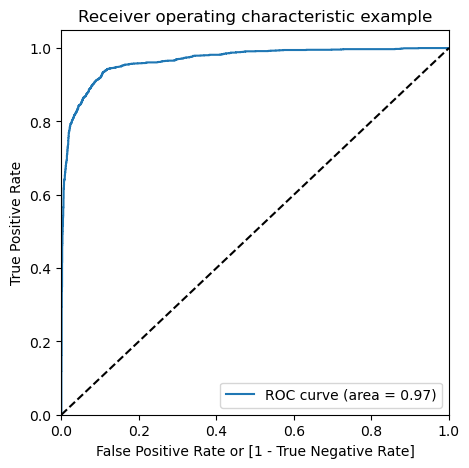

In [166]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point
#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [167]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1979,1,0.926314,1979,1,1,1,1,1,1,1,1,1,1,1
6249,0,0.472066,6249,0,1,1,1,1,1,0,0,0,0,0
5557,0,0.089375,5557,0,1,0,0,0,0,0,0,0,0,0
7865,0,0.002895,7865,0,1,0,0,0,0,0,0,0,0,0
8491,0,0.006552,8491,0,1,0,0,0,0,0,0,0,0,0


In [168]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.816050  0.965027  0.731172
0.2   0.2  0.901033  0.943687  0.876731
0.3   0.3  0.906842  0.919976  0.899358
0.4   0.4  0.913081  0.887967  0.927389
0.5   0.5  0.913511  0.845287  0.952381
0.6   0.6  0.911360  0.809129  0.969605
0.7   0.7  0.905981  0.778305  0.978723
0.8   0.8  0.895654  0.743331  0.982438
0.9   0.9  0.866394  0.647303  0.991219


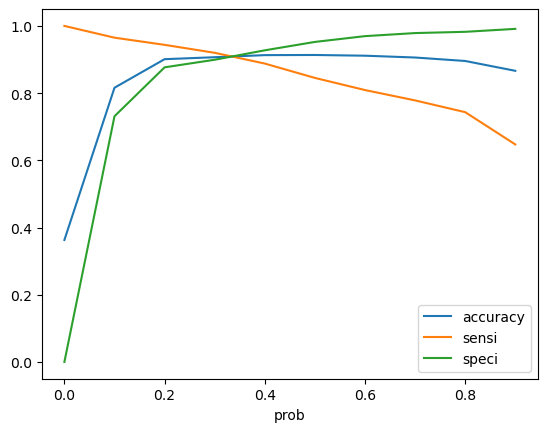

In [169]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [170]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1979,1,0.926314,1979,1,1,1,1,1,1,1,1,1,1,1,1
6249,0,0.472066,6249,0,1,1,1,1,1,0,0,0,0,0,1
5557,0,0.089375,5557,0,1,0,0,0,0,0,0,0,0,0,0
7865,0,0.002895,7865,0,1,0,0,0,0,0,0,0,0,0,0
8491,0,0.006552,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [171]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
1979,1,0.926314,1979,1,93
6249,0,0.472066,6249,1,47
5557,0,0.089375,5557,0,9
7865,0,0.002895,7865,0,0
8491,0,0.006552,8491,0,1


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.911144578313253

In [173]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2710,  251],
       [ 162, 1525]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9039715471250741

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.9152313407632556

## Observation:

## So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
## Accuracy : 91.11%
## Sensitivity : 90.39%
## Specificity : 91.52%
## Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [179]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.08476865923674434


In [180]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8586711711711712


In [181]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9435933147632312


In [182]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2710,  251],
       [ 162, 1525]], dtype=int64)

##### Precision

In [183]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8586711711711712

##### Recall

In [184]:
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9039715471250741

In [185]:
from sklearn.metrics import precision_score, recall_score

In [186]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8586711711711712

In [187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9039715471250741

In [188]:
from sklearn.metrics import precision_recall_curve

In [189]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

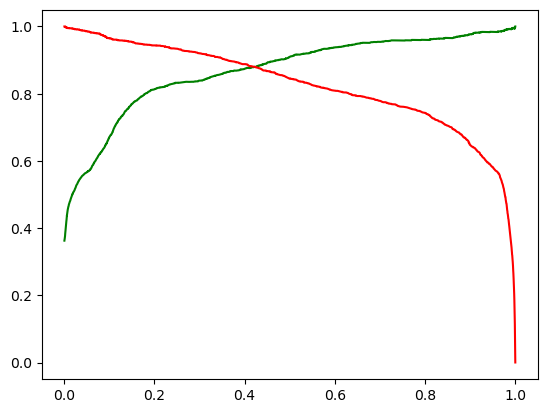

In [190]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [191]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8280,-0.783851,-0.236439,-0.628396,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6941,-0.783851,-1.021301,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7343,4.621518,0.028867,-0.545456,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3734,-0.063135,-0.582810,0.647593,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Lead Source_Olark Chat,...,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8280,-0.236439,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6941,-1.021301,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7343,0.028867,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3734,-0.582810,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [194]:
y_test_pred = res.predict(X_test_sm)

In [195]:
y_test_pred[:10]

8970    0.002393
8280    0.212586
6941    0.006237
7343    0.938727
3734    0.104853
7889    0.664890
837     0.006148
8227    0.026377
7245    0.999563
8622    0.907734
dtype: float64

In [196]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [197]:
# Let's see the head
y_pred_1.head()

,0
8970,0.002393
8280,0.212586
6941,0.006237
7343,0.938727
3734,0.104853


In [198]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [199]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [200]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [202]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.002393
1,0,8280,0.212586
2,0,6941,0.006237
3,0,7343,0.938727
4,0,3734,0.104853


In [203]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [204]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.002393
1,0,8280,0.212586
2,0,6941,0.006237
3,0,7343,0.938727
4,0,3734,0.104853


In [205]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [206]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.002393,0
1,8280,0,0.212586,21
2,6941,0,0.006237,1
3,7343,0,0.938727,94
4,3734,0,0.104853,10


In [207]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [208]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.002393,0,0
1,8280,0,0.212586,21,0
2,6941,0,0.006237,1,0
3,7343,0,0.938727,94,1
4,3734,0,0.104853,10,0


In [209]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9091365461847389

In [210]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1152,  106],
       [  75,  659]], dtype=int64)

In [211]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8978201634877384

In [213]:
# Let us calculate specificity
TN / float(TN+FP)

0.9157392686804452

In [214]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8614379084967321

In [215]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8978201634877384

In [ ]:
## Observation:

#### After running the model on the Test Data these are the figures we obtain:
#### Accuracy : 90.91%
#### Sensitivity : 89.78%
#### Specificity : 91.57%

### Final Observation:

#### Let us compare the values obtained for Train & Test:

### Train Data:
#### Accuracy : 91.11%
#### Sensitivity : 90.39%
#### Specificity : 91.52%

### Test Data:
#### Accuracy : 90.92%
#### Sensitivity : 89.78%
#### Specificity : 91.57%

## The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model